In [1]:
import sys, os
import pandas as pd
import numpy as np

from rdkit import Chem

sys.path.append('../../Woodward_Fieser_Rules-main/src/')
import chromopredict as cp

In [2]:
def get_wf_outputs(smiles, solvent=None, debug=False, extended=False):
    pred, d_contrib, img = cp.predict(smiles, solvent, debug=debug, draw=False, extended=extended)
    return pred, d_contrib, img

def get_wf_refine_outputs(smiles, solvent=None, debug=False, extended=False):
    pred, d_contrib, img = cp.woodward_refine_predict(smiles, solvent, debug=debug, draw=False)
    return pred, d_contrib, img


In [3]:
d_kang = {
    1: {'smiles': 'C=CC(=O)C', 'nm_exp': 214},
    2: {'smiles': 'C=CC(=O)CCCCCCCCCC', 'nm_exp': 212},
    3: {'smiles': 'C=CC(=O)CC1CCCCC1', 'nm_exp': 213},
    4: {'smiles': 'C=CC(=O)CC1=CC=CC=C1', 'nm_exp': 210},
    5: {'smiles': 'C=CC(=O)C1CCCCC1', 'nm_exp': 212},
    6: {'smiles': 'C=CC(=O)C1CCC2(CC1)OCCO2', 'nm_exp': 214},
    7: {'smiles': 'C=CC(=O)C1CCCCCC1', 'nm_exp': 212.5},
    8: {'smiles': 'C=C1CCCC1=O', 'nm_exp': 231},
    9: {'smiles': 'C=C1CCCCC1=O', 'nm_exp': 230},
    10: {'smiles': 'C=C1CCCCCC1=O', 'nm_exp': 230},
    11: {'smiles': 'C=C1C[C@H]2[C@@H]3CC[C@@H]4C[C@@H](CC[C@]4(C)[C@H]3C(=O)C[C@]2(C)C1=O)OC(=O)C', 'nm_exp': 228},
    12: {'smiles': 'C=C1C[C@H]2[C@@H]3CC[C@@H]4C[C@@H](CC[C@]4(C)[C@H]3[C@H](C[C@]2(C)C1=O)O)O', 'nm_exp': 227},
    13: {'smiles': 'C1CCC(=C2CCCC2=O)C1', 'nm_exp': 259},
    14: {'smiles': 'C1CCC(=C2CCCCC2=O)CC1', 'nm_exp': 257},
    15: {'smiles': 'CCCCCCCC[C@H]1CC(=O)C2=C3CC[C@H]4C[C@H](CC[C@]4(C)[C@H]3CC[C@]12C)OC(=O)C', 'nm_exp': 257},
    16: {'smiles': 'CCCCCCCC[C@H]1C[C@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 'nm_exp': 256},
    17: {'smiles': 'CCCCCCCC[C@H]1C[C@@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 'nm_exp': 257}
}

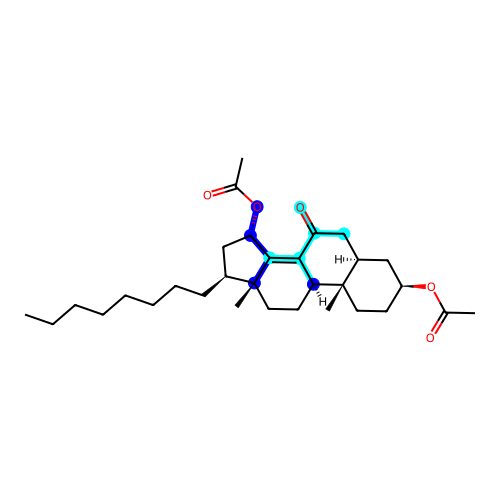

In [28]:
pred, descr, im = get_wf_refine_outputs('CCCCCCCC[C@H]1C[C@@H](C2=C3[C@H](CC[C@]12C)[C@@]4(C)CC[C@@H](C[C@@H]4CC3=O)OC(=O)C)OC(=O)C', 
                                        solvent=None, debug=True, extended=True)

im

In [30]:
for idx, d_ in d_kang.items():
    smi = d_['smiles']
    if smi != '':
        d_['wf'], _, _ = get_wf_outputs(smi, solvent=None, debug=False, extended=False)
        d_['wfe'], _, _ = get_wf_outputs(smi, extended=True)
        d_['wfr'], d_['descr'], d_['im_wf'] = get_wf_refine_outputs(smi, solvent=None, debug=True, extended=False)
        #print(descr)

df = pd.DataFrame.from_dict(d_kang, orient='index')
df.head(n=5)

,smiles,nm_exp,wf,wfe,wfr,descr,im_wf
1,C=CC(=O)C,214.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,C=CC(=O)CCCCCCCCCC,212.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,C=CC(=O)CC1CCCCC1,213.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,C=CC(=O)CC1=CC=CC=C1,210.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
5,C=CC(=O)C1CCCCC1,212.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [20]:
beta_all = []
alpha_all = []
gamma_all = []

for _, vals in df['descr'].items():
    alpha_all.append(vals['alpha_all'])
    beta_all.append(vals['beta_all'])
    gamma_all.append(vals['gamma_all'])

In [21]:
beta_all

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'},
  {'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'}],
 [{'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'},
  {'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'}],
 [{'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'},
  {'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'}],
 [{'pattern': 'alkoxy', 'value': 23, 'sub_type': 'beta'},
  {'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'}],
 [{'pattern': 'alkoxy', 'value': 23, 'sub_type': 'beta'},
  {'pattern': 'alkyl', 'value': 17, 'sub_type': 'beta'}]]

In [22]:
alpha_all

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}],
 [{'pattern': 'alkyl', 'value': 14, 'sub_type': 'alpha'}]]

In [23]:
gamma_all

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [34]:
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

for i, row in df.iterrows():
    img = row['im_wf']
    smiles = row['smiles']

    # Sanitize SMILES string to use as a valid filename
    # Remove or replace any illegal filename characters
    safe_smiles = "".join(c if c.isalnum() else "_" for c in smiles)
    save_smi = str(i)+'_'+str(safe_smiles)

    filename = os.path.join(output_dir, f"{save_smi}.png")
    img.save(filename, format='PNG')
    

In [35]:
df.head(n=17)

,smiles,nm_exp,wf,wfe,wfr,descr,im_wf
1,C=CC(=O)C,214.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
2,C=CC(=O)CCCCCCCCCC,212.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
3,C=CC(=O)CC1CCCCC1,213.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
4,C=CC(=O)CC1=CC=CC=C1,210.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
5,C=CC(=O)C1CCCCC1,212.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
6,C=CC(=O)C1CCC2(CC1)OCCO2,214.0,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
7,C=CC(=O)C1CCCCCC1,212.5,215,213,215,"{'base': 215, 'factor': 0, 'exo': 0, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
8,C=C1CCCC1=O,231.0,230,229,234,"{'base': 215, 'factor': 0, 'exo': 5, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
9,C=C1CCCCC1=O,230.0,230,229,234,"{'base': 215, 'factor': 0, 'exo': 5, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...
10,C=C1CCCCCC1=O,230.0,230,229,234,"{'base': 215, 'factor': 0, 'exo': 5, 'alpha': ...",<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [36]:
7-5.9

1.0999999999999996